In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
data1 = pd.read_excel('Data_Train.xlsx')

In [ ]:
data1.columns = ['Company', 'Date', 'Origin','Destination','Route','Departure Time','Arrival Time','Duration Time','Total_Stops','Additional_Info','Flight Price']
data1.head()

,Company,Date,Origin,Destination,Route,Departure Time,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data1.isna().sum()

Company            0
Date               0
Origin             0
Destination        0
Route              1
Departure Time     0
Arrival Time       0
Duration Time      0
Total_Stops        1
Additional_Info    0
Flight Price       0
dtype: int64

In [ ]:
data1.dtypes

Company            object
Date               object
Origin             object
Destination        object
Route              object
Departure Time     object
Arrival Time       object
Duration Time      object
Total_Stops        object
Additional_Info    object
Flight Price        int64
dtype: object

In [ ]:
def change(col):
  data1[col]= pd.to_datetime(data1[col])

In [ ]:
data1.columns

Index(['Company', 'Date', 'Origin', 'Destination', 'Route', 'Departure Time',
       'Arrival Time', 'Duration Time', 'Total_Stops', 'Additional_Info',
       'Flight Price'],
      dtype='object')

In [ ]:
for i in['Date','Departure Time','Arrival Time']:
         change(i)

<ipython-input-6-b6642d410c5a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1[col]= pd.to_datetime(data1[col])


In [ ]:
data1.dtypes


Company                    object
Date               datetime64[ns]
Origin                     object
Destination                object
Route                      object
Departure Time     datetime64[ns]
Arrival Time       datetime64[ns]
Duration Time              object
Total_Stops                object
Additional_Info            object
Flight Price                int64
dtype: object

In [ ]:
data1['Date of journey']=data1['Date'].dt.day
data1['Month of journey']=data1['Date'].dt.month


In [ ]:
data1.head()

,Company,Date,Origin,Destination,Route,Departure Time,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-08 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 05:50:00,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-08 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 18:05:00,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 16:50:00,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
data1.drop('Date',axis=1,inplace = True)

In [ ]:
data1.head()

,Company,Origin,Destination,Route,Departure Time,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-08 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 05:50:00,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-08 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 18:05:00,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 16:50:00,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [ ]:
def extrahour(df,col):
    df[col+'_hour']= df[col].dt.hour
def extra(df,col):
    df[col+'_min']= df[col].dt.minute
def dropcol(df,col):
   df.drop(col,axis=1,inplace = True)

In [ ]:
extrahour(data1,'Departure Time')
extra(data1,'Departure Time')
dropcol(data1,'Departure Time')

In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [ ]:
d =list(data1['Duration Time'])
for i in range(len(d)):
  if(len(d[i].split(' '))==2):
     pass
  else:
    if 'h' in d[i]:
      d[i] =d[i] + '00m'
    else:
       d[i] = '0h'+ d[i]


In [ ]:
data1['Duration Time']=d

In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h00m,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [ ]:
'1h 20m'.split(' ')[1][0:-1]

'20'

In [ ]:
def get_hours(time_str):
    if ' ' in time_str:
        hours, minutes = time_str.split()
        hours = hours[:-1]  # remove the last character ('m')
        return int(hours)
    else:
        return 0





In [ ]:
data1['Duration in hours'] =data1['Duration Time'].apply(get_hours)


In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h00m,2 stops,No info,13882,6,9,9,25,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,4


In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h00m,2 stops,No info,13882,6,9,9,25,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,4


In [ ]:
def get_minutes3(time_str):
    if ' ' in time_str:
        hours, minutes = time_str.split()
        minutes = minutes[:-1]  # remove the last character ('m')
        return int(minutes)
    else:
        return 0  # or some other default value if the format is invalid

In [ ]:
data1['Duration in minutes'] =data1['Duration Time'].apply(get_minutes3)

In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Duration Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours,Duration in minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h00m,2 stops,No info,13882,6,9,9,25,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,4,45


In [ ]:
data1.dtypes

Company                        object
Origin                         object
Destination                    object
Route                          object
Arrival Time           datetime64[ns]
Duration Time                  object
Total_Stops                    object
Additional_Info                object
Flight Price                    int64
Date of journey                 int64
Month of journey                int64
Departure Time_hour             int64
Departure Time_min              int64
Duration in hours               int64
Duration in minutes             int64
dtype: object

In [ ]:
dropcol(data1,'Duration Time')

In [ ]:
cat_cols = data1.select_dtypes(include='object').columns
cat_cols

Index(['Company', 'Origin', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [ ]:
continuos_col = data1.select_dtypes(include='int').columns
continuos_col

Index(['Flight Price', 'Date of journey', 'Month of journey',
       'Departure Time_hour', 'Departure Time_min', 'Duration in hours',
       'Duration in minutes'],
      dtype='object')

In [ ]:
 categorical_data = data1[cat_cols]

In [ ]:
categorical_data.head()

,Company,Origin,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [ ]:
categorical_data['Company'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Company, dtype: int64

In [ ]:
airprice = pd.get_dummies(categorical_data['Company'],drop_first =True)

In [ ]:
airprice.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
origins = pd.get_dummies(categorical_data['Origin'],drop_first =True)
origins.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
data1.head()

,Company,Origin,Destination,Route,Arrival Time,Total_Stops,Additional_Info,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours,Duration in minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-08 13:15:00,2 stops,No info,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,2 stops,No info,13882,6,9,9,25,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-06-08 23:30:00,1 stop,No info,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-06-08 21:35:00,1 stop,No info,13302,3,1,16,50,4,45


In [ ]:
Destination1= pd.get_dummies(categorical_data['Destination'],drop_first =True)
Destination1.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
categorical_data.isnull().sum()

Company            0
Origin             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
dtype: int64

In [ ]:
for i in categorical_data.columns:
  print('{} has total {} categories'.format(i,len(categorical_data[i].value_counts())))

Company has total 12 categories
Origin has total 5 categories
Destination has total 6 categories
Route has total 128 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories


In [ ]:
categorical_data['Route1']= categorical_data['Route'].str.split('→').str[0]
categorical_data['Route2']= categorical_data['Route'].str.split('→').str[1]
categorical_data['Route3']= categorical_data['Route'].str.split('→').str[2]
categorical_data['Route4']= categorical_data['Route'].str.split('→').str[3]
categorical_data['Route5']= categorical_data['Route'].str.split('→').str[4]

<ipython-input-42-f89a8d359dcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route1']= categorical_data['Route'].str.split('→').str[0]
<ipython-input-42-f89a8d359dcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Route2']= categorical_data['Route'].str.split('→').str[1]
<ipython-input-42-f89a8d359dcd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
categorical_data.head()

,Company,Origin,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [ ]:
dropcol(categorical_data,'Route')

<ipython-input-14-ea06d4de9da3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(col,axis=1,inplace = True)


In [ ]:
categorical_data.isnull().sum()

Company                0
Origin                 0
Destination            0
Total_Stops            1
Additional_Info        0
Route1                 1
Route2                 1
Route3              3492
Route4              9117
Route5             10637
dtype: int64

In [ ]:
categorical_data.columns

Index(['Company', 'Origin', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
        categorical_data[i].fillna('None',inplace= True)

<ipython-input-47-39e1b192742f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[i].fillna('None',inplace= True)


In [ ]:
categorical_data.isnull().sum()

Company            0
Origin             0
Destination        0
Total_Stops        1
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [ ]:
for k in categorical_data.columns:
  print('{} has total {} categories'.format(k,len(categorical_data[k].value_counts())))

Company has total 12 categories
Origin has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 6 categories
Route2 has total 46 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
E = LabelEncoder()

In [ ]:
categorical_data.columns

Index(['Company', 'Origin', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [ ]:
for k in [ 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
     categorical_data[k]=  E.fit_transform(categorical_data[k])

<ipython-input-53-e4d41e7263fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[k]=  E.fit_transform(categorical_data[k])
<ipython-input-53-e4d41e7263fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[k]=  E.fit_transform(categorical_data[k])
<ipython-input-53-e4d41e7263fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
categorical_data.head()

,Company,Origin,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [ ]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
o = pd.get_dummies(categorical_data['Total_Stops'],drop_first =True)
o.head()

,2 stops,3 stops,4 stops,non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [ ]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
categorical_data = categorical_data.dropna(subset=['Total_Stops'])

In [ ]:
categorical_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
d = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(d)

<ipython-input-61-ebbb9fed2f02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['Total_Stops'] = categorical_data['Total_Stops'].map(d)


In [ ]:
categorical_data.head()

,Company,Origin,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5


In [ ]:
trained_data = pd.concat([categorical_data,airprice,origins,Destination1,data1[continuos_col]],axis =1)


In [ ]:
trained_data.head()

,Company,Origin,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5,...,Hyderabad,Kolkata,New Delhi,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours,Duration in minutes
0,IndiGo,Banglore,New Delhi,0.0,No info,0.0,13.0,29.0,13.0,5.0,...,0,0,1,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,2.0,25.0,1.0,3.0,5.0,...,0,0,0,7662,5,1,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,3.0,32.0,4.0,5.0,5.0,...,0,0,0,13882,6,9,9,25,0,0
3,IndiGo,Kolkata,Banglore,1.0,No info,2.0,34.0,3.0,13.0,5.0,...,0,0,0,6218,5,12,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,0.0,34.0,8.0,13.0,5.0,...,0,0,1,13302,3,1,16,50,4,45


In [ ]:
trained_data1 = pd.concat([categorical_data,airprice,origins,Destination1,data1[continuos_col]],axis =1)

In [ ]:
dropcol(trained_data,'Company')
dropcol(trained_data,'Origin')
dropcol(trained_data,'Destination')


In [ ]:
dropcol(trained_data,'Additional_Info')

In [ ]:
pd.set_option('display.max_columns',35)

In [ ]:
trained_data.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Flight Price,Date of journey,Month of journey,Departure Time_hour,Departure Time_min,Duration in hours,Duration in minutes
0,0.0,0.0,13.0,29.0,13.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,2,50
1,2.0,2.0,25.0,1.0,3.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,7,25
2,2.0,3.0,32.0,4.0,5.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,0,0
3,1.0,2.0,34.0,3.0,13.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,5,25
4,1.0,0.0,34.0,8.0,13.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,4,45


In [ ]:
trained_data.dtypes

Total_Stops                          float64
Route1                               float64
Route2                               float64
Route3                               float64
Route4                               float64
Route5                               float64
Air India                              uint8
GoAir                                  uint8
IndiGo                                 uint8
Jet Airways                            uint8
Jet Airways Business                   uint8
Multiple carriers                      uint8
Multiple carriers Premium economy      uint8
SpiceJet                               uint8
Trujet                                 uint8
Vistara                                uint8
Vistara Premium economy                uint8
Chennai                                uint8
Delhi                                  uint8
Kolkata                                uint8
Mumbai                                 uint8
Cochin                                 uint8
Delhi     

In [ ]:
num_rows, num_cols = trained_data.shape

In [ ]:
def plot(df, col):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    sns.distplot(df[col], ax=ax1, color ='red')
    sns.boxplot(df[col], ax=ax2, color = 'green')

<ipython-input-72-59cc594684f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1, color ='red')


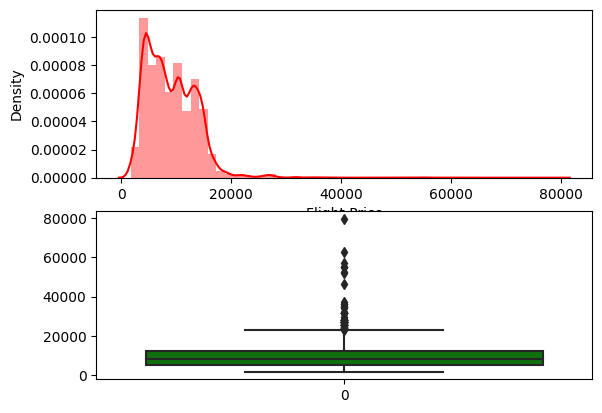

In [ ]:
plot(trained_data1,'Flight Price')

In [ ]:
trained_data['Flight Price']= np.where(trained_data['Flight Price']>40000,trained_data['Flight Price'].median(),trained_data['Flight Price'])

<ipython-input-72-59cc594684f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=ax1, color ='red')


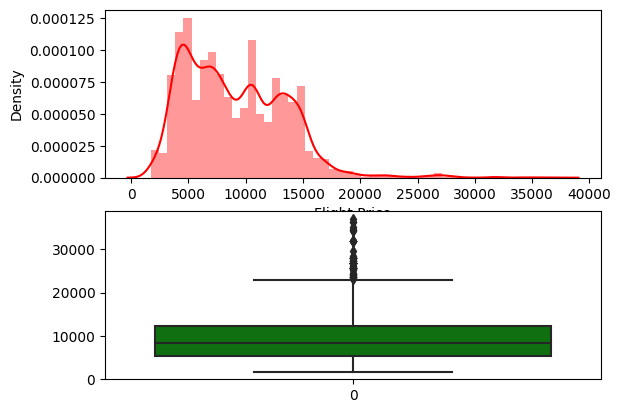

In [ ]:
plot(trained_data,'Flight Price')

In [ ]:
data =trained_data.dropna()

# Separate features and target variable

x = data.drop('Flight Price', axis =1)

In [ ]:
y = trained_data['Flight Price']
y1 = y[:-1]

In [ ]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Flight Price, dtype: float64

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info_classif(x,y1)

array([1.95939911, 2.38670895, 2.95541131, 2.56014224, 1.6595936 ,
       1.41673846, 0.6682928 , 0.08613611, 0.6087592 , 0.88515092,
       0.        , 0.53231721, 0.00765207, 0.30724739, 0.        ,
       0.2085799 , 0.        , 0.17021661, 1.36031815, 0.81399924,
       0.26668138, 1.37961191, 0.39749963, 0.28630393, 0.16446489,
       0.33499786, 1.24075849, 1.10849492, 1.52240566, 1.28222533,
       1.69331387, 1.14259997])

In [ ]:
I = pd.DataFrame(mutual_info_classif(x,y1),index = x.columns)

In [ ]:
I.columns =['Important']
I.sort_values(by = 'Important',ascending = False)

,Important
Route2,3.023556
Route3,2.571287
Route1,2.301949
Total_Stops,1.871930
Route4,1.735569
Duration in hours,1.667636
Departure Time_hour,1.498609
Route5,1.466604
Cochin,1.335857
Delhi,1.331154


In [ ]:
X1 = trained_data[['Route2', 'Route3', 'Route1','Total_Stops','Duration in hours','Route4']]


In [ ]:
y1 = trained_data['Flight Price']

In [ ]:
print(X1.shape)
print(y1.shape)

(10683, 6)
(10683,)


In [ ]:
y1 = y1.values.reshape(-1, 1)

In [ ]:
print(X1.shape)
print(y1.shape)

(10683, 6)
(10683, 1)


In [ ]:
X1 = X1[:-1]

In [ ]:
y1 = y1[:-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LinearRegression()
lr.fit(X_train, y_train)

score = lr.score(X_test,y_test)
print('Accuracy of Multiple Regression Is ',score*100,'%')
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2)


Accuracy of Multiple Regression Is  45.888784421524875 %
Mean squared error: 11081853.110597875
Mean Absolute Error: 2358.2868838523996
R-squared: 0.45888784421524875


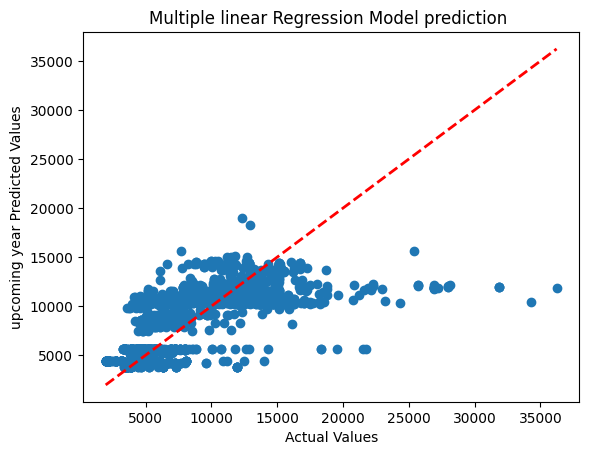

In [ ]:
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)

# Add a line of best fit
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Set axis labels and title
plt.xlabel('Actual Values')
plt.ylabel('upcoming year Predicted Values')
plt.title('Multiple linear Regression Model prediction ')

# Show the plot
plt.show()

In [ ]:
X2 = trained_data[['Route2']]


In [ ]:
X2 = X2[:-1]

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2,y1, test_size=0.2, random_state=42)

In [ ]:
scaler1 = StandardScaler()
X_train1 = scaler1.fit_transform(X_train1)
X_test1 = scaler1.transform(X_test1)

lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)
score1 = lr1.score(X_test1,y_test1)
print('Accuracy of Linear Regression Is ',score1*100,'%')
y_pred = lr1.predict(X_test1)
mse1 = mean_squared_error(y_test1, y_pred)
rsquare = r2_score( y_test1 , y_pred)
print('Mean Absolute Error:', mean_absolute_error(y_test1, y_pred))
print('Mean squared error:', mse1)
print('R-squared:', rsquare)



Accuracy of Linear Regression Is  0.5954368773949059 %
Mean Absolute Error: 3642.438529063792
Mean squared error: 20357827.02848878
R-squared: 0.005954368773949059


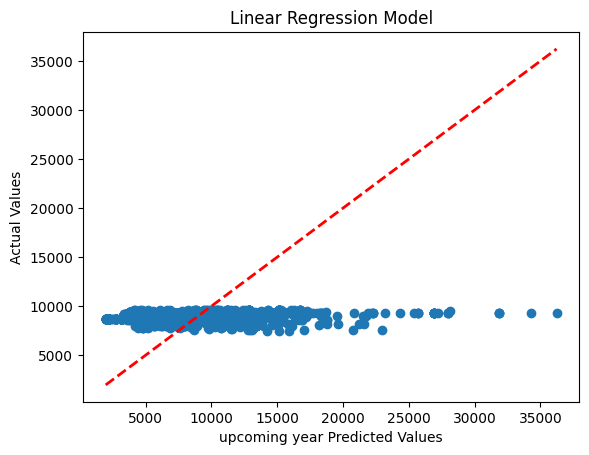

In [ ]:
lr1.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred = lr1.predict(X_test1)

# Plot the predicted values against the actual values
plt.scatter(y_test1, y_pred)

# Add a line of best fit
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'r--', lw=2)

# Set axis labels and title (swapped x and y axis labels)
plt.ylabel('Actual Values')
plt.xlabel('upcoming year Predicted Values')
plt.title('Linear Regression Model')

# Show the plot
plt.show()




In [ ]:


# Select the important features for prediction
X = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x3 =X[:-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x3, y1, test_size=0.2, random_state=42)

# Create a Random Forest Regression model with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the model to predict prices of the test set
y_pred = rf.predict(X_test)
score2 = rf.score(X_test,y_test)
print('Accuracy of Random Forest Regression Is ',score2*100,'%')
# Evaluate the performance of the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

<ipython-input-98-618770c4f458>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy of Random Forest Regression Is  55.65123708135188 %
Mean Absolute Error: 2018.372620719844
Mean Squared Error: 9082525.148385108
R-squared: 0.5565123708135188


In [ ]:
X5 = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x4 =X5[:-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x4, y1, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
score3 = svr.score(X_test,y_test)
print('Accuracy of Support vector Regression Is ',score3*100,'%')
y_pred = svr.predict(X_test)

print('R-squared:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Support vector Regression Is  39.28097001591174 %
R-squared: 0.3928097001591174
Mean Absolute Error: 2356.6001340584858
Mean Squared Error: 12435118.37810789


In [ ]:



# Sample input features (independent variables) and target values (dependent variable)
X6 = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x7 =X6[:-1]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x7, y1, test_size=0.2, random_state=42)

# Create a KNN regressor with k=3
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)
score4 = knn.score(X_test,y_test)
print('Accuracy of KNN regression Is ',score4*100,'%')
# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Accuracy of KNN regression Is  47.53688768476011 %
Mean Squared Error: 10744325.334165236
Mean Absolute Error: 2130.181250974887
R-squared: 0.4753688768476011


<ipython-input-101-2c3acb56bf80>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


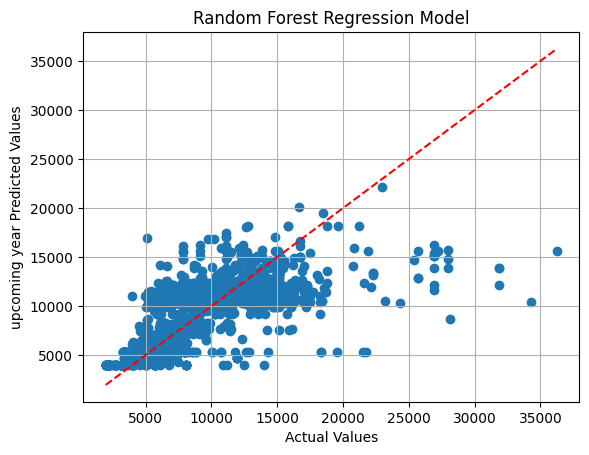

In [ ]:



# Assuming you have imported the necessary libraries and defined your X and y variables
X7 = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x4 =X7[:-1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x4, y1, test_size=0.2, random_state=42)

# Create a Random Forest Regression model with 100 estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Use the model to predict prices of the test set
y_pred = rf.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('upcoming year Predicted Values')
plt.title('Random Forest Regression Model')
plt.grid(True)
plt.show()

# Evaluate the performance of the model


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


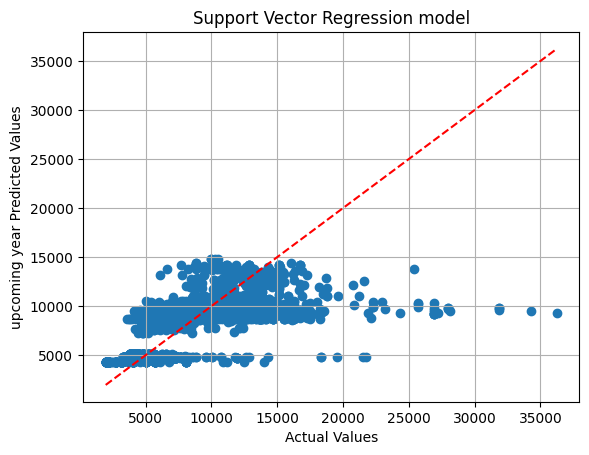

In [ ]:


# Assuming you have imported the necessary libraries and defined your X and y variables
X9 = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x8 =X9[:-1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x8, y1, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Get the predicted values
y_pred = svr.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('upcoming year Predicted Values')
plt.title('Support Vector Regression model')
plt.grid(True)
plt.show()




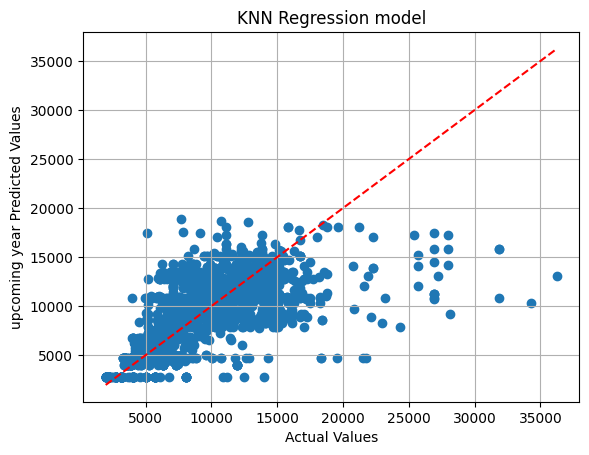

Mean Squared Error: 10744325.334165236
Mean Absolute Error: 2130.181250974887
R-squared: 0.4753688768476011


In [ ]:


# Assuming you have imported the necessary libraries and defined your X6 and y1 variables
X10 = trained_data[['Route2', 'Route3', 'Route1', 'Total_Stops', 'Route4', 'Duration in hours']]

x10 =X10[:-1]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x10, y1, test_size=0.2, random_state=42)

# Create a KNN regressor with k=3
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('upcoming year Predicted Values')
plt.title('KNN Regression model')
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
